In [6]:
# communities = []
# semiAggAlpha = os.listdir('Eredmenyek/PizzutiAlphaTest//')
# for f in os.listdir('mLFR4/'):
#   if f.endswith('Community.txt') and (f.startswith('3layer_mu0.1')):
#     communities.append(f)
# out = []
# for f1 in semiAggAlpha:
#   if str(f1).startswith('3layer'):
#     for f2 in communities:
#       f11 = 'Eredmenyek/PizzutiAlphaTest/' + f1
#       f22 = 'mLFR4/' + f2
#       out.append([f11, f22])

In [29]:
import networkx as nx
import numpy as np
import pandas as pd
import os

from community import best_partition
from math import sqrt

import matplotlib.pyplot as plt

from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics.cluster import adjusted_mutual_info_score as AMI

In [117]:
p = 'Eredmenyek/'
e = 'Modularity'
# e = 'Pizzuti'
# e = 'Pizzuti0.1'
e = 'Semi Agg'
# e = 'SemiAggPizzuti'
# e = 'SemiAggPizzuti0.1'

pp = p + e + '/'
ppp = os.listdir(pp)
communities = []
for f in os.listdir('mLFR4/'):
  if f.endswith('Community.txt') and (f.startswith('3') or f.startswith('4')):
    communities.append(f)

out = []
for f in ppp:
  if not (f.startswith('3')):
    continue
  f1 = pp + f
  f = f.split('_')
  for i in range(1,int(f[0][0])+1):
    f2 = 'mLFR4/' + f[0][:6] + '_' + f[0][6:] + '_multi_Layer' + str(i) + '_Community.txt'
    out.append([f1, f2])
    
inputs = out
base = None
scores = pd.DataFrame(columns=['Layer', 'NMIScore', 'AMIScore'])
for mlfrInput in inputs:
  for i in range(len(mlfrInput)):
    fileName = mlfrInput[i]
    if i == 0:
      base = pd.read_csv(fileName, sep=" ", header=None)
      base = np.array(base[1].values)
    else:
      currentLayer = pd.read_csv(fileName, sep=" ", header=None)
      currentLayer = np.array(currentLayer[1].values)
      scores = scores.append({'Layer' : mlfrInput[0] + '--' + fileName, 'NMIScore' : NMI(base, currentLayer), 'AMIScore' : AMI(base, currentLayer)}, ignore_index=True)
# scores.to_csv(e + '.txt', sep=' ', header=False, index=False)

In [97]:
for key in labels:
  print(key)

L1
L2
L3


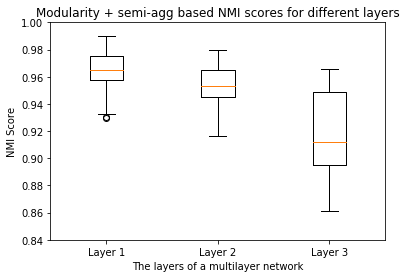

In [118]:
prevLayer = ''
labels = {}
for i, row in scores.iterrows():
  l = scores['Layer'][i].split('--')[1].split('/')[1].split('_')
  layer = '_'.join(l[:2])
  layer = layer + '_' + l[3]
  if abs(float(layer[9:12]) - 0.1) > 0.1:
      continue
  if 'L' + layer[-1] not in labels:
    labels['L' + layer[-1]] = []
  labels['L' + layer[-1]].append(scores['NMIScore'][i])
data = []
for key in labels:
  data.append(labels[key])
plt.boxplot(data)
plt.xticks([1,2,3], ['Layer 1', 'Layer 2', 'Layer 3'])
plt.ylabel('NMI Score')
plt.xlabel('The layers of a multilayer network')
plt.ylim([0.84, 1])
plt.title('Modularity + semi-agg based NMI scores for different layers')
plt.savefig(e.replace('.','').replace(' ', '') + 'layers.png', dpi=300)
plt.show()
# # e.replace('.','').replace(' ', '')

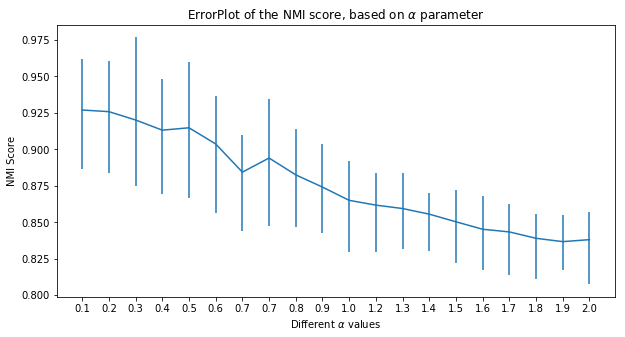

In [121]:
d = dict()
err = []
maxi = dict()
mini = dict()
db = 0
for i, row in scores.iterrows():
  layer = str(scores['Layer'][i].split('--')[0].split('/')[2].split('_')[1][7:])
  if layer not in d:
    d[layer] = 0
    mini[layer] = 1
    maxi[layer] = 0
    db = 0
  db += 1
  d[layer] += scores['NMIScore'][i]
  if scores['NMIScore'][i] < mini[layer]:
    mini[layer] = scores['NMIScore'][i]
  if scores['NMIScore'][i] > maxi[layer]:
    maxi[layer] = scores['NMIScore'][i]
    
    
for key in d:
  d[key] /= 30
  mini[key] = abs(mini[key] - d[key])
  maxi[key] = abs(maxi[key] - d[key])

mini = np.asarray([mini[key] for key in mini])
maxi = np.asarray([maxi[key] for key in maxi])
mini
err = np.array(list(zip(mini, maxi)))
err.T
dd = []
labels = []
for key in d:
  dd.append(d[key])
  labels.append(key[0:3])
plt.xticks([i for i in range(0, len(labels))], labels)
plt.gcf().set_size_inches(10,5)
plt.ylabel('NMI Score')
plt.xlabel('Different $\\alpha$ values')
plt.title('ErrorPlot of the NMI score, based on $\\alpha$ parameter')
plt.errorbar(list(d), dd, yerr=err.T)
plt.savefig('pizzutiAlpha.png', dpi=300)